<H1> Binomial distribution</H1>

Binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the number of successes in a sequence of n independent Bernoulli experiments, which probalility of success is $p$. A single success / failure experiment is called a Bernoulli trial or Bernoulli experiment and a sequence of outcomes is called a Bernoulli process; for a single trial, $n = 1$, the Binomial distribution becomes a Bernoulli distribution. <br><br>
Binomial distribution was derived by Jacob Bernoulli. He considered the case where $p = r/(r + s)$ where p is the probability of success and r and s are positive integers. Blaise Pascal had earlier considered the case where $p = 1/2$.

## Preparation Concept: Coin Flip (+1/-1)

In [39]:
# Fair Coin Flip, Head is 1, Tail is -1, to show how the sum is distributed, this is NOT binormal distribution!

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
num_of_flips = 100
num_of_rounds = 1000
p = 0.5

In [57]:
rounds = []  # save the result of each round

In [58]:
def sum_of_round(num_of_flips):
    #result = #Heads - #Tail = #Heads - (#Flips - #Heads) = 2*#Heads - #Flips
    result = 2*sum(np.random.rand(num_of_flips)< p)-num_of_flips
    return result

In [59]:
for round in range(num_of_rounds):
    round_sum = sum_of_round(num_of_flips)
    rounds.append(round_sum)
#print(rounds)
print(f"The number of flip is {num_of_flips}, the number of rounds is {num_of_rounds}")
print(f"The mean is {np.mean(rounds)}, the standard deviation is {np.std(rounds)}")

The number of flip is 100, the number of rounds is 1000
The mean is 0.364, the standard deviation is 9.959693971202126


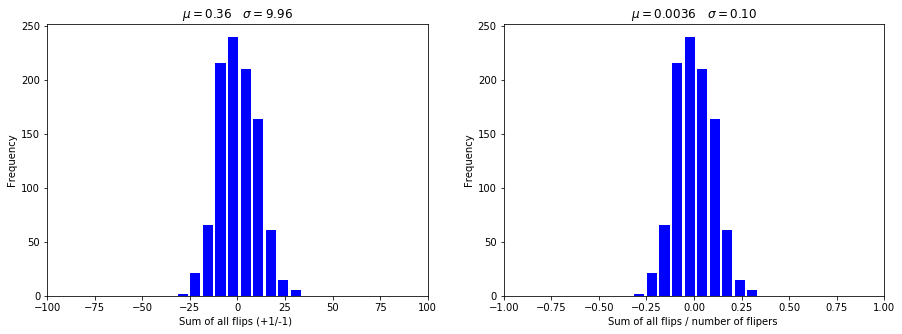

In [71]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(rounds, color ='Blue', rwidth=0.8)
plt.xlabel('Sum of all flips (+1/-1) ')
plt.ylabel('Frequency')
plt.xlim(num_of_flips*(-1),num_of_flips)
plt.title('$\mu=' + "{0:.2f}".format(np.mean(rounds)) +'\quad'+'\sigma=' +"{0:.2f}".format(np.std(rounds)) + '$')
# \quad stands for space in Letax

plt.subplot(1,2,2)
rounds_n = [round / num_of_flips for round in rounds]  #normalized x-Axis
plt.hist(rounds_n, color ='Blue', rwidth=0.8)
plt.xlabel('Sum of all flips / number of flipers ')
plt.ylabel('Frequency')
plt.xlim(-1,1)
plt.title('$\mu=' + "{0:.4f}".format(np.mean(rounds)/num_of_flips)  + '\quad'+ '\sigma=' + "{0:.2f}".format(np.std(np.multiply(rounds,1/num_of_flips)))+ '$')
plt.show()

<H1> Binomial Distribution </H1>
<H3> A unfaired coin with probability of Head is $p$, trialed independently $n$ times, $k$ successes</H3> 
### PMF: $B_{p,n}(k) = {n\choose k}p^k(1-p)^{n-k}$,<br>
#### Why: the probalility of $k$ successes is $p^k$, $n-k$ failure is $(n-k)^{1-p}$, for every k-success sequence, there are ${n\choose k}$ sequences.

$X\sim B_{p,n}  \quad X = \sum_{i=1}^n{X_i}  \quad X_1,...,X_n \sim B_p  \quad X_i\perp X_j \quad 0<i,j<n \quad i,j \in N$
### $E[X]= E[\sum_{i=1}^n{X_i}] = \sum_{i=1}^n {E[X_i]} = \sum_{i=1}^n {p} = np$              <br> 
$Var(X) = Var(\sum_{i=1}^n{X_i}) = \sum_{i=1}^n{Var(X_i)} = np(1-p)  \quad \sigma = \sqrt{npq}$

In [73]:
p=0.7
num_of_flips = 100
num_of_rounds = 1000

In [74]:
rounds_result = np.sum(np.random.rand(num_of_rounds, num_of_flips)<p, axis =1)
print(f"The experiment Mean is {np.mean(rounds_result)}, Standard Deviation is {np.std(rounds_result)}")
print(f"The actual mean is {num_of_flips*p}, Standard deviation is {np.sqrt(num_of_flips*p*(1-p))}")

The experiment Mean is 70.149, Standard Deviation is 4.6187443098747085
The actual mean is 70.0, Standard deviation is 4.582575694955841


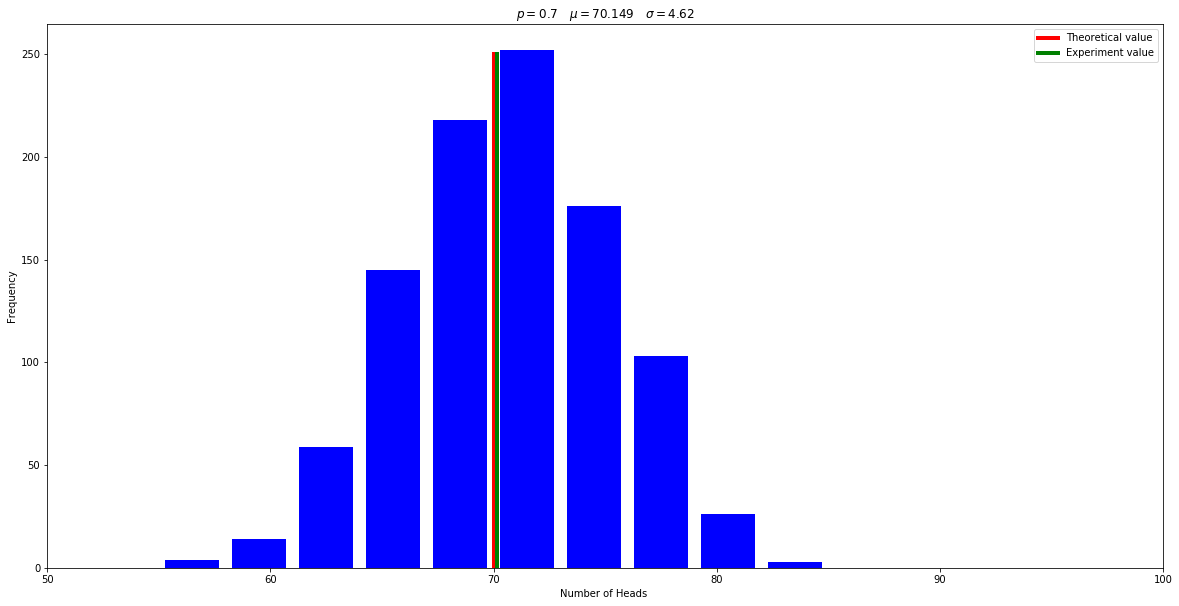

In [79]:
plt.figure(figsize=(20,10))
plt.hist(rounds_result, color ='Blue', rwidth=0.8)
plt.xlabel('Number of Heads ')
plt.ylabel('Frequency')
plt.xlim(num_of_flips/2,num_of_flips)
x=[num_of_flips*p,num_of_flips*p]
y=[0,250]
plt.plot(x,y, 'r',linewidth=4, label = 'Theoretical value')
x=[np.mean(rounds_result),np.mean(rounds_result)]
y=[0,250]
plt.plot(x,y, 'g',linewidth=4, label = 'Experiment value')
plt.legend()
plt.title('$p=0.7 \quad \mu=' +str(np.mean(rounds_result))  + '\quad'+'\sigma=' +"{0:.2f}".format(np.std(rounds_result))+ '$')
plt.show()

In [82]:
def calc_prob(num_of_rounds, num_of_flips, m, n):
    '''
       Calculate the probability of the num_of_flips toss results fall in the range(m,n)
       num_of_rounds
       num_of_flips
       m is the lower limit of the range
       n is the upper limit of the range
       prob is the percentage of sum of head within range(m,n)
    '''
    rounds_result = np.sum(np.random.rand(num_of_rounds, num_of_flips)>0.5, axis =1)
    prob = np.sum([round >=m and round <n for round in rounds_result])/num_of_rounds
    return prob

In [81]:
calc_prob(1000, 100, 40, 60)

0.956

In [72]:
import ipywidgets as widgets
from scipy import stats

def plot_pmf(n, p):
    '''
    Plot PMF of Binom(n, p)
    n: number of trial
    p: probalility
    '''
    k = np.arange(0, n + 1)
    p_k = stats.binom.pmf(k, n, p)
    plt.plot(k, p_k, '-x', color='b')

    plt.title(f'PMF of Binormial Dsitribution $B({p},{n})$')
    plt.xlabel('Number of successes: k')
    plt.ylabel('Probability of k successes')
    #     axes = plt.gca() #Get the Current Axes instance  
    #     axes.set_xlim([0, n+1])
    #     axes.set_ylim([0, 1.1 * max(p_k)])
    plt.show()


widgets.interact(
    plot_pmf,
    n = widgets.IntSlider(min=0, max=50, step=1, value=25),
    p = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5))


A Jupyter Widget

<function __main__.plot_pmf>

# Related Distributions: 
<ul><li>The Bernoulli Distribution is a special case of the Binomial Distribution, where number of experiment n = 1. <br> 
<li>Poission Distribution can be seen as divided into infinity number of small intervals, each interval is Bernoulli Distribution. Poisson process is a continuous version of Bernoulli process.
<li>When n is large, and p is small (usually n>50, np < 5), Binormial Distribution can be approximated by Possion Distribution. 
<ul>Why need approximation? 1) The factorials and exponential can become problemetic to calculate and have round off error when n is very large; 2) sometimes, n and/or p is not known, only know mean of occurence $\lambda$.</ul>
<li>In Bernoulli process, the inter-arrival time is Geometric Distribution; in the Possion process, the inter-arrival time is Exponential Distribution. (Exponential Distribution is a continous analogue of Geometric Distribution.
<li>Binomial Distribution can also be generialized into Possion Binomial Distribution, in which case, $p_i$ is different in each trial, suppose we know all $p_i$. <br>